importing necessary libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as sk

Testing some random things

In [10]:
# x= np.array([[1,2,3],[4,5,6]])
# y= np.array([[1,2,3],[4,5,6],[7,8,9]])
# s=0
# st=0
# for i in range(len(x)):
#     s+= np.dot(x[i],y[i])
#     st= np.dot(x[i],y[i])
#     print(st)
# x= np.array([],dtype=float)
# print(x)
# x[0]= 2
# x[1]=4
# x= np.vstack((x,np.array([7,8,9])))
# print(x)

IMPORTING THE DATA FOR TRAINING AND TESTING

In [11]:
da= sk.load_wine()
x,y=da.data,da.target
x= np.c_[[1]*178,x]
# print(len(x))
train_size= int(len(x)*0.8)
x_test,y_test=x[train_size:],y[train_size:]
x,y=list(x[:train_size]),y[:train_size]
y_reserve= np.array(y)
# preparing y as a matrix output(in 1 hot representation)
ytemp= y.copy()
y=[]
y_class_indices=[[]]*3
for i in range(len(ytemp)):
    y.append([0,0,0])
    y[i][ytemp[i]]=1
    y_class_indices[ytemp[i]].append(i)

we define some variables to be used in the entire code

In [12]:
n= len(x)    # total number of training lexamples
k= len(y[0])  # Total number of classes
f= len(x[0])  # Total number of features

we define the softmax function which takes the value of x and theta as row matrices

In [13]:
def h(x,theta):
    n= len(x)
    eta= np.dot(np.transpose(theta),x)
    print(eta)
    eta= eta/max(eta)
    print(eta)
    ans= np.transpose(np.exp(eta))
    print(ans)
    ans= ans.astype(float)
    ans= ans/np.sum(ans)
    # print(ans)
    return np.transpose(ans)

Defining the cost function for applying gradient descent

In [14]:
def cost(y_pred,y_true):
    loss= 0
    for i in range(len(y_true)):
        loss+= np.log(np.dot(x[i],y[i]))
    return -np.sum(loss)

now we create a function to train our model and make it return a matrix theta of the parameters

In [15]:
def multiclass_train(x,y):
    theta= np.array([[1]*k]*f,dtype=float)     #here theta is a matrix of column vectors each of which is unique for its class
    alp=0.01
    counter=0
    stp=1e+10

    while stp>0 and counter<100:
        step= [[]]*k
        for i in range(k):
            variable=[0]*f
            # print(variable)
            for j in y_class_indices[i]:
                variable= variable+(x[j]*(1-h(x[j],theta)[i]))
                # print(x[j]*(1-h(x[j],theta)[i]))
                # print(variable)
                # print()
            step[i]= variable
            # step= np.vstack((step,variable))
        step= np.array(step)
        theta= theta+np.transpose(step)
        stp= np.sum(np.absolute(step))
        counter+=1
    print(theta)
    return theta

Now we test our code over the testing data

[1246. 1246. 1246.]
[1. 1. 1.]
[2.71828183 2.71828183 2.71828183]
[1195.1 1195.1 1195.1]
[1. 1. 1.]
[2.71828183 2.71828183 2.71828183]
[1342.82 1342.82 1342.82]
[1. 1. 1.]
[2.71828183 2.71828183 2.71828183]
[1651.49 1651.49 1651.49]
[1. 1. 1.]
[2.71828183 2.71828183 2.71828183]
[909.69 909.69 909.69]
[1. 1. 1.]
[2.71828183 2.71828183 2.71828183]
[1616.23 1616.23 1616.23]
[1. 1. 1.]
[2.71828183 2.71828183 2.71828183]
[1437.46 1437.46 1437.46]
[1. 1. 1.]
[2.71828183 2.71828183 2.71828183]
[1469.78 1469.78 1469.78]
[1. 1. 1.]
[2.71828183 2.71828183 2.71828183]
[1192.82 1192.82 1192.82]
[1. 1. 1.]
[2.71828183 2.71828183 2.71828183]
[1197.46 1197.46 1197.46]
[1. 1. 1.]
[2.71828183 2.71828183 2.71828183]
[1671.6 1671.6 1671.6]
[1. 1. 1.]
[2.71828183 2.71828183 2.71828183]
[1426.17 1426.17 1426.17]
[1. 1. 1.]
[2.71828183 2.71828183 2.71828183]
[1461. 1461. 1461.]
[1. 1. 1.]
[2.71828183 2.71828183 2.71828183]
[1291.68 1291.68 1291.68]
[1. 1. 1.]
[2.71828183 2.71828183 2.71828183]
[1702.52 1702

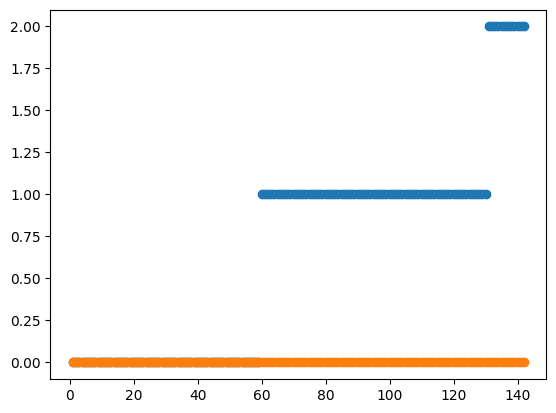

In [16]:
theta= multiclass_train(x,y)
print("*")
xplot=np.array([i for i in range(1,len(x)+1)])
predicted_test=[]
for i in x:
    variable= list(h(i,theta))
    print(variable)
    print("**\n")
    predicted_test.append(variable.index(max(variable)))
predicted_test= np.array(predicted_test)
# counter=0
# for i in range(len(y_test)):
#     if y_test[i]!=predicted_test[i]:
#         counter+=1
# print(f"{counter} are wrong out of {len(y_test)}")
# print(len(x_test),len(y_test),len(predicted_test))
plt.scatter(xplot,y_reserve)
plt.scatter(xplot,predicted_test)
plt.show()
